In [1]:
# Below is the link for data set

# https://raw.githubusercontent.com/krishnaik06/K-NEarest-Neighbor/master/Classified%20Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/manu/K-Nearest-Neighour/Classified Data')

In [4]:
df.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0           0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1           1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2           2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3           3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4           4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0  0.759697  0.643798  0.879422  1.231409             1  
1  0.675334  1.013546  0.621552  1.492702             0  
2  1.626351  1.154483  0.957877  1.285597             0  
3  1.409708  1.380003  1.522692  1.153093             1  
4  1.115596  0.646691  1.463812  1.419167             1

In [5]:
df.shape

(1000, 12)

In [6]:
df.describe()

Unnamed: 0          WTT          PTI          EQW          SBI  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000     0.949682     1.114303     0.834127     0.682099   
std     288.819436     0.289635     0.257085     0.291554     0.229645   
min       0.000000     0.174412     0.441398     0.170924     0.045027   
25%     249.750000     0.742358     0.942071     0.615451     0.515010   
50%     499.500000     0.940475     1.118486     0.813264     0.676835   
75%     749.250000     1.163295     1.307904     1.028340     0.834317   
max     999.000000     1.721779     1.833757     1.722725     1.634884   

               LQE          QWG          FDJ          PJF          HQE  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.032336     0.943534     0.963422     1.071960     1.158251   
std       0.243413     0.256121     0.255118     0.288982     0.293738   
min       0.315307     0.262389     0.295228     0.299476     0.365157   
25%       0.870855     0.761064     0.784407     0.866306     0.934340   
50%       1.035824     0.941502     0.945333     1.065500     1.165556   
75%       1.198270     1.123060     1.134852     1.283156     1.383173   
max       1.650050     1.666902     1.713342     1.785420     1.885690   

               NXJ  TARGET CLASS  
count  1000.000000    1000.00000  
mean      1.362725       0.50000  
std       0.204225       0.50025  
min       0.639693       0.00000  
25%       1.222623       0.00000  
50%       1.375368       0.50000  
75%       1.504832       1.00000  
max       1.893950       1.00000

KNN algo largly gets affected by scale of the feature, greater the scale more will be the impact of that feature. Since here we donot want to give equal weightage to all feature, we will standard scale the values except the target values

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [10]:
scaled_feature = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [11]:
df_1 = pd.DataFrame(scaled_feature, columns= df.columns[:-1])

In [12]:
df_1.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0   -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1   -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2   -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3   -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4   -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   

        FDJ       PJF       HQE       NXJ  
0 -0.798951 -1.482368 -0.949719 -0.643314  
1 -1.129797 -0.202240 -1.828051  0.636759  
2  2.599818  0.285707 -0.682494 -0.377850  
3  1.750208  1.066491  1.241325 -1.026987  
4  0.596782 -1.472352  1.040772  0.276510

In [13]:
import seaborn as sns

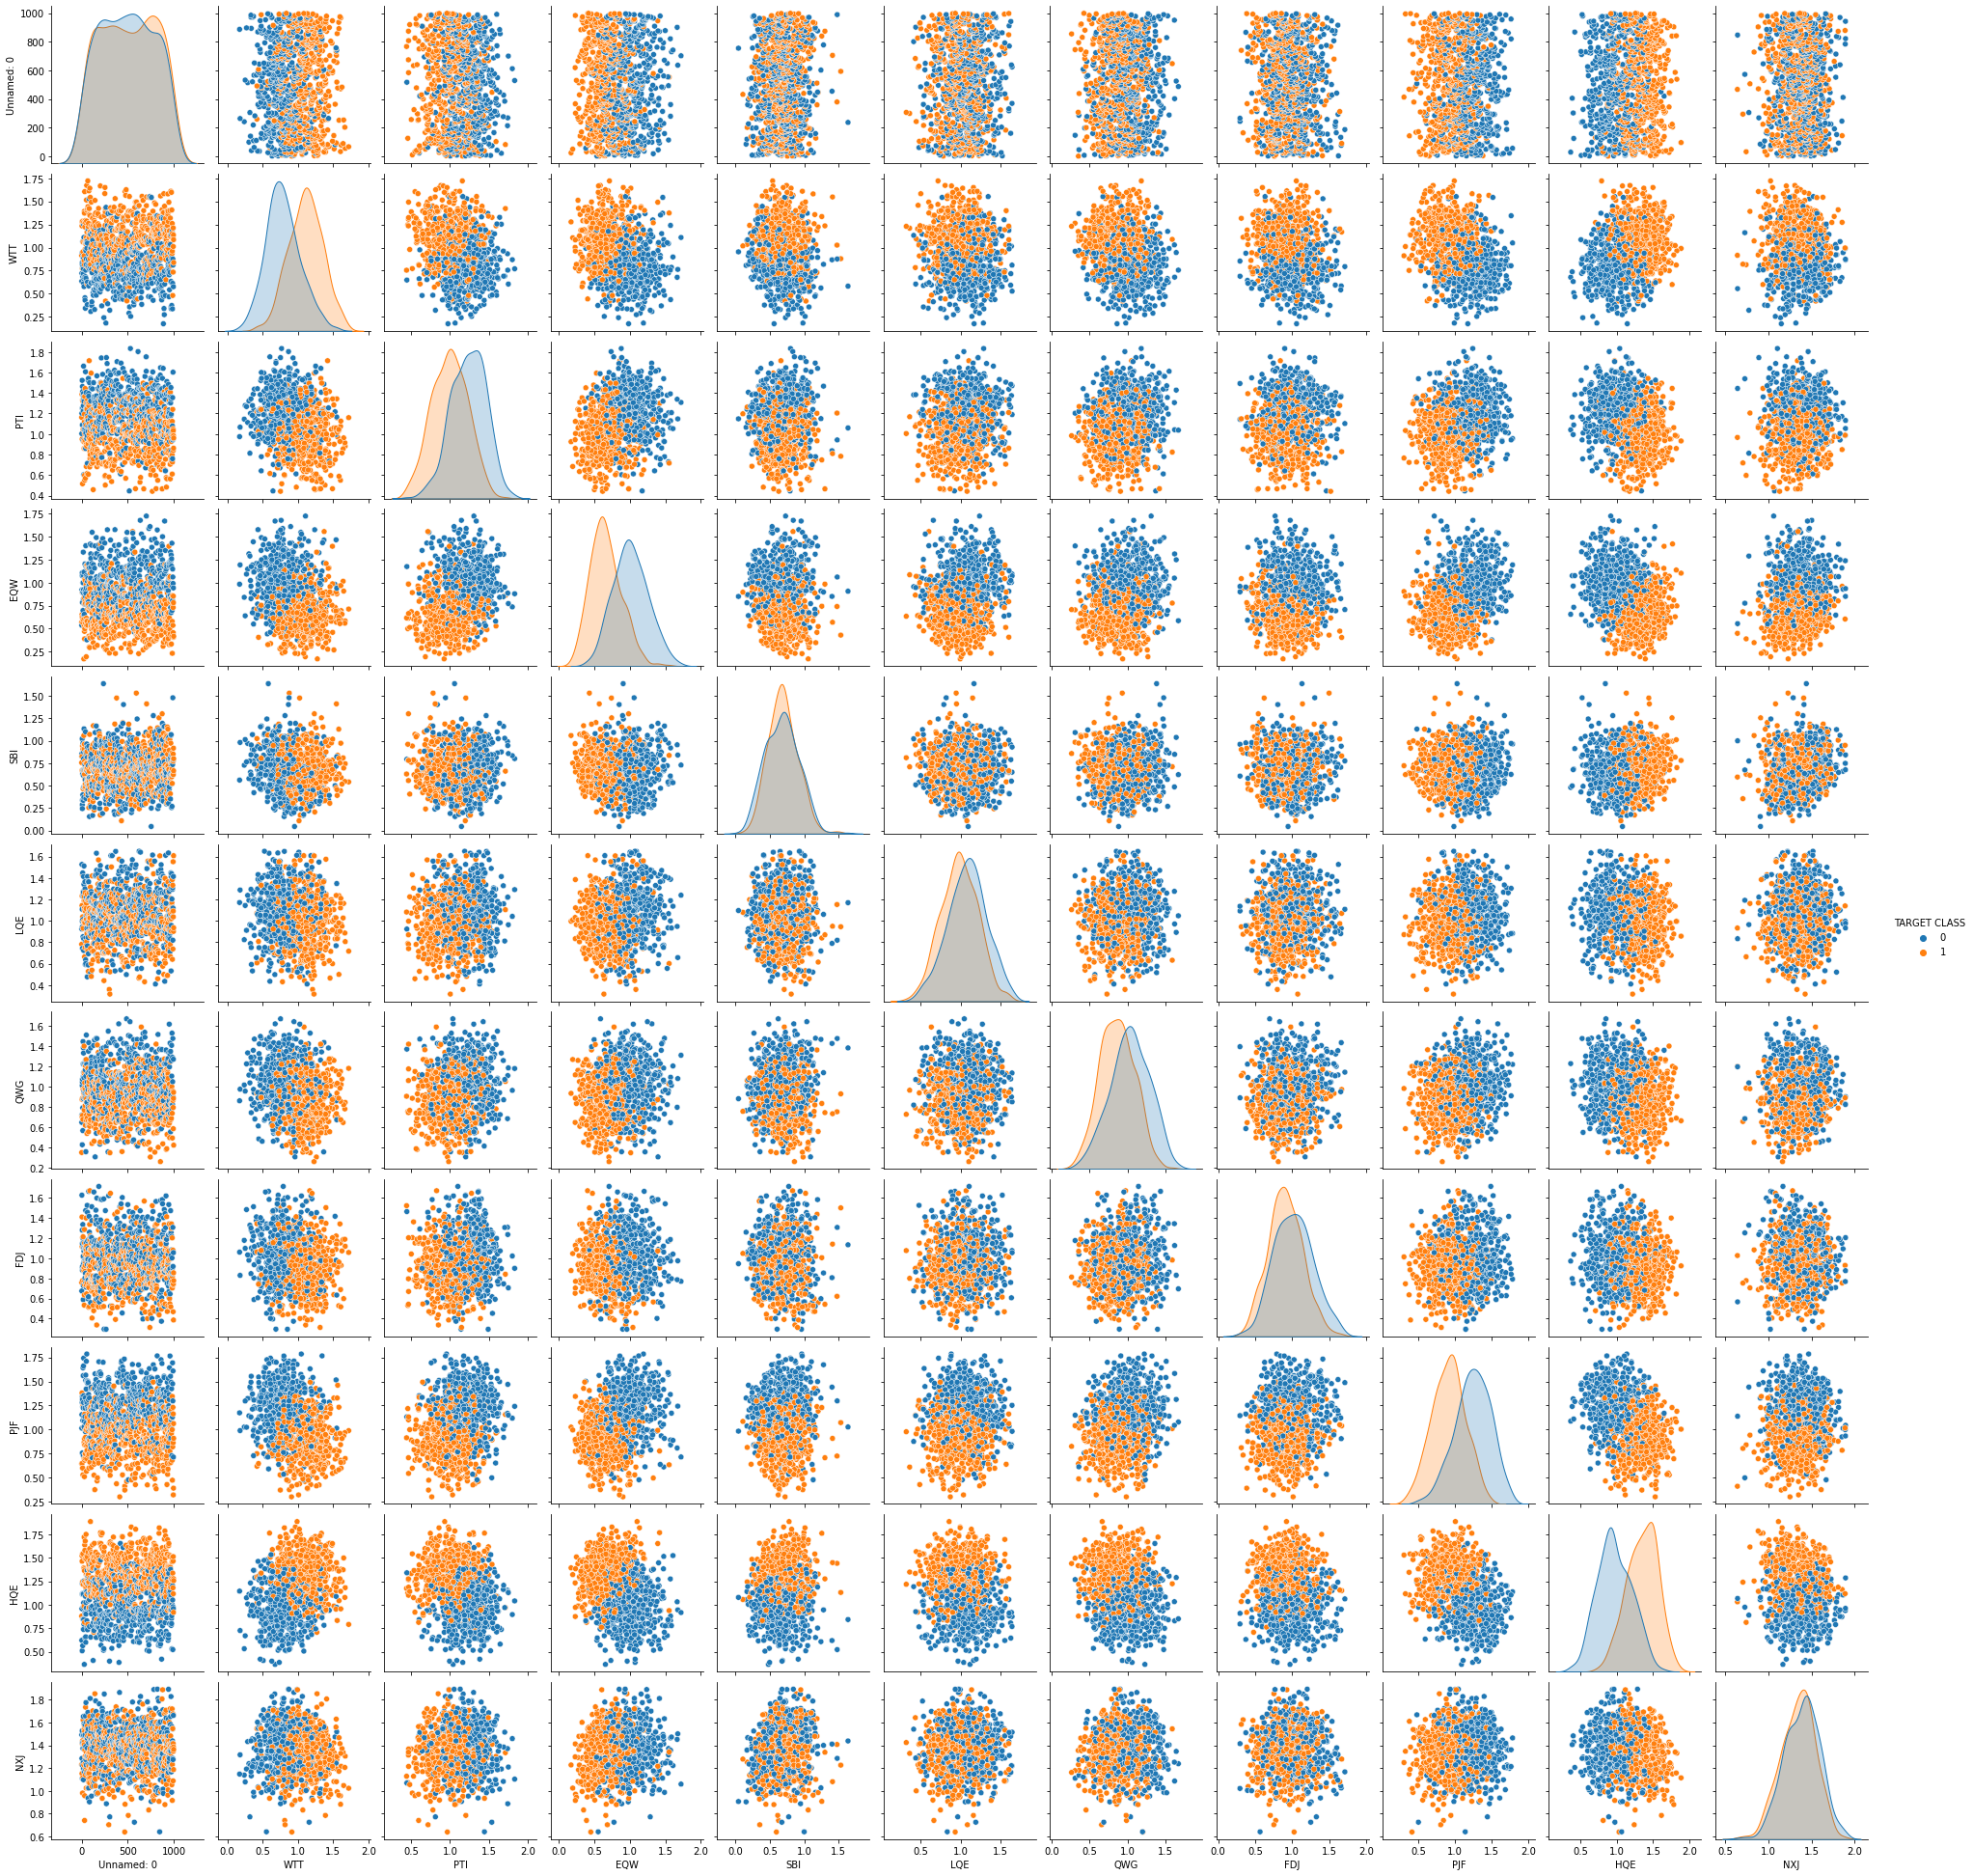

In [14]:
sns.pairplot(df, hue = 'TARGET CLASS')

Implementing KNN algo

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature,df['TARGET CLASS'],
                                                    test_size=0.30)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

# here we are randomly putting the values for n_neighbors

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
pred = knn.predict(X_test)

Evaluating KNN model

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [27]:
print(confusion_matrix(y_test, pred))

[[146  15]
 [  7 132]]


In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       161
           1       0.90      0.95      0.92       139

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [ ]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_1,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

In [34]:
print(len(pred))

300


In [35]:
# declaring a list
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

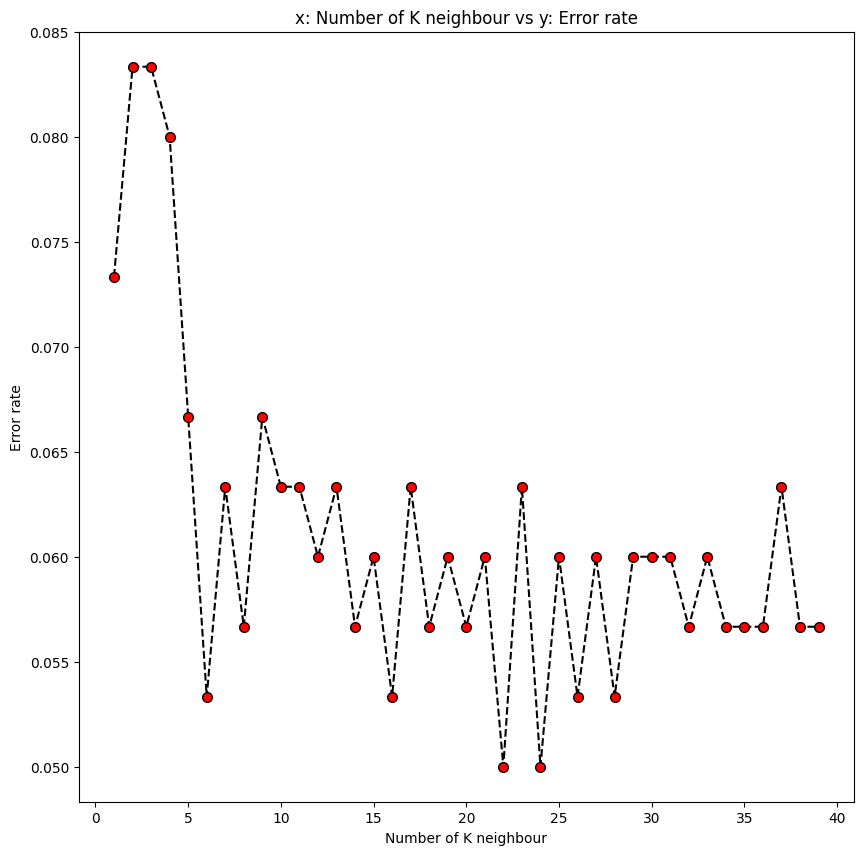

In [51]:
# plotting figure b/t error rate and k_value

plt.figure(figsize = (10, 10))
plt.plot(range (1, 40), error_rate, color = 'black', linestyle='--', marker='o', markerfacecolor='red', markersize=7)
plt.title('x: Number of K neighbour vs y: Error rate')
plt.xlabel('Number of K neighbour')
plt.ylabel('Error rate')


 From above graphs we can understand that at Number of K neighbour with minumum error is either at 22 or 24. Therefore we will fit our model with these Number of K neighbour.

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
#plt.show()